In [23]:
from c3s_511_trends import TrendLims1D, assess_trend_consistency

# Examples

## Reading in the data, resampling and plotting

Loaded datafile ehdb_t2m.nc
Subsetted to timeperiod 1902-01-01-2017-12-31
Resampled to Y frequency
Creating a plot with label: None


/net/exo/landclim/crezees/conda/envs/esmval1/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2030: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


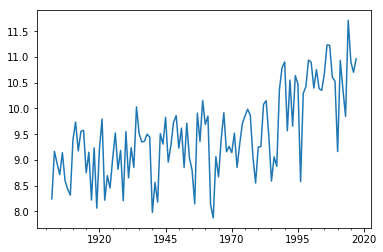

In [42]:
mydat = TrendLims1D('De Bilt T2M','ehdb_t2m.nc')
mydat.subset(slice('1902-01-01','2017-12-31')) 
mydat.resample('Y') # Resample to yearly resolution
mydat.plot()

## Continue the analysis with calculating linear trend test

In [43]:
mydat.trend_linear() # units are in C/decade
mydat.print_stats()

Calculated linear trend test
{'trend_linear': {'pvalue': 1.260711970521823e-15,
                  'slope': 0.1619501301179658,
                  'slope_low': 0.1445151212995213,
                  'slope_up': 0.1793851389364103,
                  'stderr': 0.017435008818444498,
                  'trend': 1}}


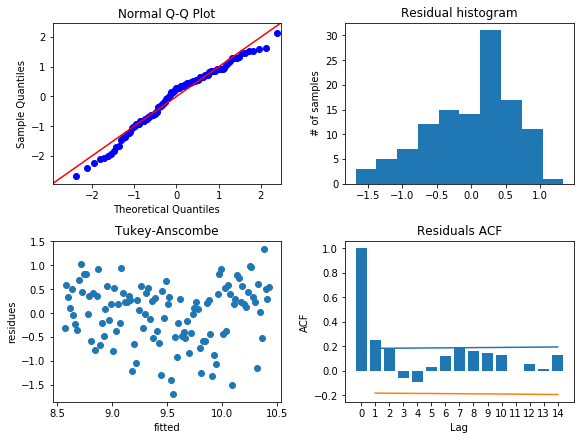

In [44]:
mydat.do_residual_analysis('trend_linear')
pass # dummy statement for preventing image showing up twice

## Now also perform Theil-Sen slope estimator and Mann-Kendall test

In [45]:
mydat.trend_mktest()
mydat.trend_theilsen()
mydat.print_stats()

Calculated Mann-Kendall test
Calculated Theil-Sen slope
{'trend_linear': {'pvalue': 1.260711970521823e-15,
                  'slope': 0.1619501301179658,
                  'slope_low': 0.1445151212995213,
                  'slope_up': 0.1793851389364103,
                  'stderr': 0.017435008818444498,
                  'trend': 1},
 'trend_mannkendall': {'h': True,
                       'p': 9.892087149410145e-13,
                       'trend': 1,
                       'z': 7.131986162666038},
 'trend_theilsen': {'slope': 0.16289997509411347,
                    'slope_low': 0.1320986205120198,
                    'slope_up': 0.1983244484878932,
                    'trend': 1}}


## Check the consistency of the different types of trend analyses

In [46]:
assess_trend_consistency(mydat) # This scoring needs more fine tuning, just a start. Scoring ranges from 0-5 currently.

The different trend tests are fully consistent and indicate a positive trend.
The two different slopes are fully consistent
Final trend score: 5


5

## Now see how consistent the tests are on a shorter timeseries

In [47]:
mydat.reset() # This resets the dataset to a state just after loading
mydat.subset(slice('1985-01-01','2012-12-31'))
mydat.resample('Y')
mydat.do_trends() # This calls all the trend tests
mydat.print_stats()
assess_trend_consistency(mydat)

Subsetted to timeperiod 1985-01-01-2012-12-31
Resampled to Y frequency
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope
{'trend_linear': {'pvalue': 0.0170631657419087,
                  'slope': 0.417117501462283,
                  'slope_low': 0.25345508994951904,
                  'slope_up': 0.5807799129750469,
                  'stderr': 0.16366241151276392,
                  'trend': 1},
 'trend_mannkendall': {'h': False,
                       'p': 0.060536002358035024,
                       'trend': 0,
                       'z': 1.876869351772299},
 'trend_theilsen': {'slope': 0.35677635721935763,
                    'slope_low': -0.008025765419006348,
                    'slope_up': 0.7239723205566406,
                    'trend': 0}}
Two out of three trend tests indicate no trend.
The two different slopes are fully consistent
Final trend score: 4


4

- Not fully consistent at the moment, probably related to Issue#3
- Are there datasets where the tests show very different results ? (I would expect so, Theil-Sen is insensitive to outliers, whereas Linear is sensitive to outliers